In [1]:
#used labelencoder
import pandas as pd

In [2]:
data=pd.read_csv('Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [4]:
#univariate analysis on continuous variables using mathematical methods
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

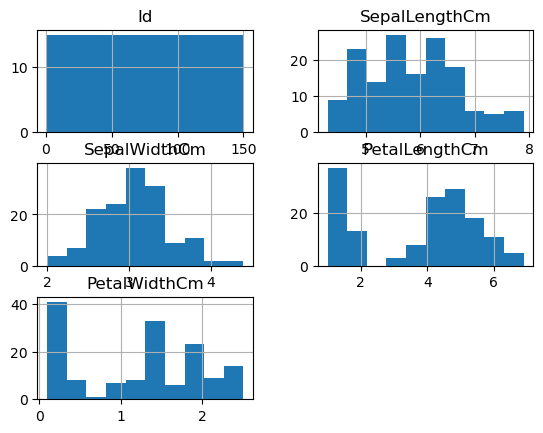

In [5]:

pd.DataFrame.hist(data)

In [6]:

data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [34]:
df=data
df = df.sample(frac=1).reset_index(drop=True)
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,95,5.6,2.7,4.2,1.3,Iris-versicolor
1,82,5.5,2.4,3.7,1.0,Iris-versicolor
2,47,5.1,3.8,1.6,0.2,Iris-setosa
3,26,5.0,3.0,1.6,0.2,Iris-setosa
4,80,5.7,2.6,3.5,1.0,Iris-versicolor
...,...,...,...,...,...,...
145,34,5.5,4.2,1.4,0.2,Iris-setosa
146,128,6.1,3.0,4.9,1.8,Iris-virginica
147,143,5.8,2.7,5.1,1.9,Iris-virginica
148,121,6.9,3.2,5.7,2.3,Iris-virginica


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['Species'])

In [36]:
df['Spec_label']=label
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Spec_label
0,95,5.6,2.7,4.2,1.3,Iris-versicolor,1
1,82,5.5,2.4,3.7,1.0,Iris-versicolor,1
2,47,5.1,3.8,1.6,0.2,Iris-setosa,0
3,26,5.0,3.0,1.6,0.2,Iris-setosa,0
4,80,5.7,2.6,3.5,1.0,Iris-versicolor,1
...,...,...,...,...,...,...,...
145,34,5.5,4.2,1.4,0.2,Iris-setosa,0
146,128,6.1,3.0,4.9,1.8,Iris-virginica,2
147,143,5.8,2.7,5.1,1.9,Iris-virginica,2
148,121,6.9,3.2,5.7,2.3,Iris-virginica,2


In [37]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,1:4]
y=df.iloc[:,-2]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_train_scaled
x_test_scaled=sc.transform(x_test)
print(x_test_scaled)

[[-1.39284197  0.30145281 -1.42836223]
 [-0.30594217 -0.38108186 -0.12426704]
 [ 0.66019099 -0.38108186  0.27263149]
 [ 0.90172428 -0.1535703   0.32933128]
 [-1.15130868  0.07394126 -1.31496264]
 [-0.90977539  0.75647593 -1.31496264]
 [ 0.05635777 -0.1535703   0.2159317 ]
 [-0.42670881 -1.51863965 -0.06756725]
 [-1.27207532 -0.1535703  -1.37166243]
 [ 1.62632415  0.30145281  1.23652793]
 [-0.42670881 -1.7461512   0.10253212]
 [-0.78900875 -0.83610497  0.04583233]
 [-1.03054203 -1.7461512  -0.29436641]
 [ 0.66019099 -0.60859342  1.00972877]
 [-0.42670881  2.57656839 -1.37166243]
 [ 1.02249093 -1.29112809  1.12312835]
 [ 1.02249093  0.07394126  0.49943066]
 [ 0.53942435 -1.7461512   0.32933128]
 [ 1.14325757 -0.60859342  0.55613045]
 [-1.27207532 -0.1535703  -1.37166243]
 [ 1.62632415 -0.1535703   1.12312835]
 [-0.42670881  0.98398749 -1.42836223]
 [ 0.29789106 -0.1535703   0.61283024]
 [-1.27207532  0.07394126 -1.25826285]
 [-0.90977539  0.98398749 -1.37166243]
 [-1.03054203  0.30145281

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred=knn.predict(x_test_scaled)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 96.67%
